In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
df = pd.read_csv("../LP-IV-datasets/ECGdataset(Ass4)/ecg_autoencoder_dataset.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0


In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(140, axis=1))
Y = df[140]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
# Build the Autoencoder model
input_dim, encoding_dim = x_train.shape[1], 8
encoder = Sequential([
    InputLayer(input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu')
])

In [29]:
decoder = Sequential([
    InputLayer(input_shape=(encoding_dim,)),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(input_dim, activation='linear')  # Use linear activation for reconstruction
])

In [30]:
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

autoencoder.fit(x_train, x_train, epochs=100, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

autoencoder.summary()

Epoch 1/100
125/125 [==============================] - 3s 6ms/step - loss: 0.6996 - val_loss: 0.4297
Epoch 2/100
125/125 [==============================] - 1s 5ms/step - loss: 0.3762 - val_loss: 0.3228
Epoch 3/100
125/125 [==============================] - 1s 5ms/step - loss: 0.2981 - val_loss: 0.2708
Epoch 4/100
125/125 [==============================] - 1s 5ms/step - loss: 0.2647 - val_loss: 0.2504
Epoch 5/100
125/125 [==============================] - 1s 5ms/step - loss: 0.2414 - val_loss: 0.2322
Epoch 6/100
125/125 [==============================] - 1s 5ms/step - loss: 0.2244 - val_loss: 0.2165
Epoch 7/100
125/125 [==============================] - 1s 5ms/step - loss: 0.2080 - val_loss: 0.1984
Epoch 8/100
125/125 [==============================] - 1s 5ms/step - loss: 0.1923 - val_loss: 0.1868
Epoch 9/100
125/125 [==============================] - 1s 5ms/step - loss: 0.1812 - val_loss: 0.1787
Epoch 10/100
125/125 [==============================] - 1s 5ms/step - loss: 0.1716 - val_lo

In [33]:
# Detect anomalies
y_pred = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - y_pred, 2), axis=1)

32/32 [==============================] - 0s 4ms/step


In [36]:
# Define a threshold for anomaly detection
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

In [37]:
# Predict anomalies
anomalies = mse > threshold

In [38]:
# Calculate the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 50


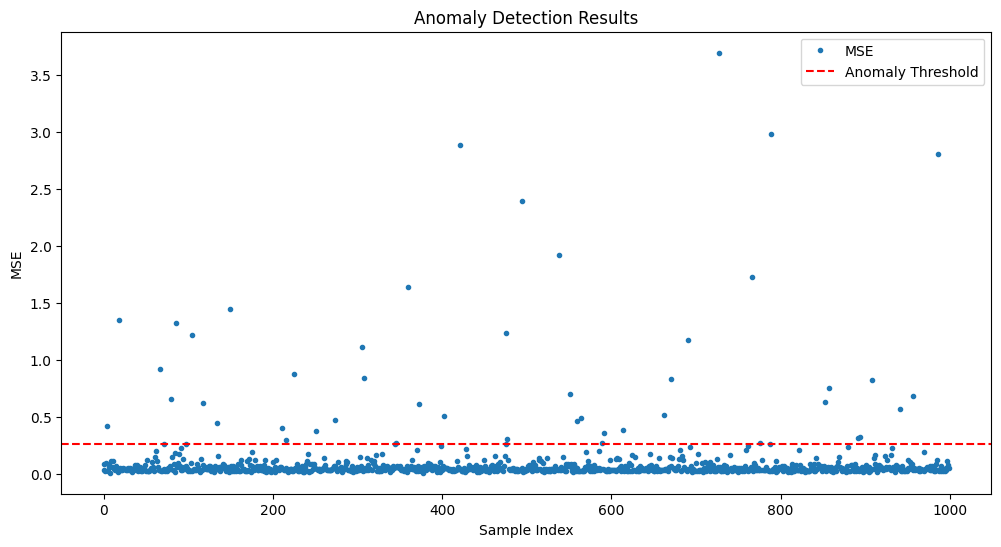

In [39]:
# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

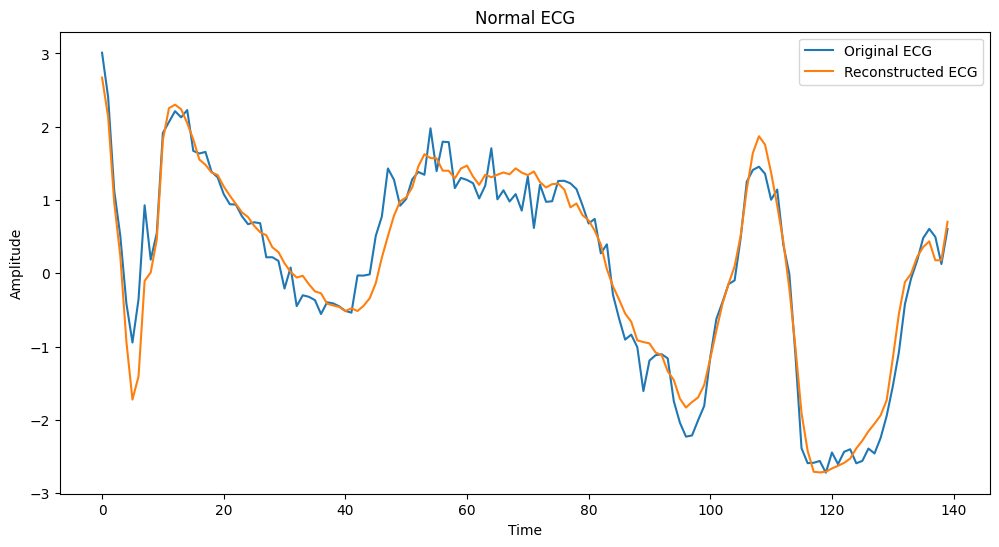

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(x_test[0], label='Original ECG')
plt.plot(y_pred[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

In [43]:
# listing the index of anomalies in X_test
anomalies_index = []
for index, anomaly in enumerate(anomalies):
    if anomaly == True :
        anomalies_index.append(index)

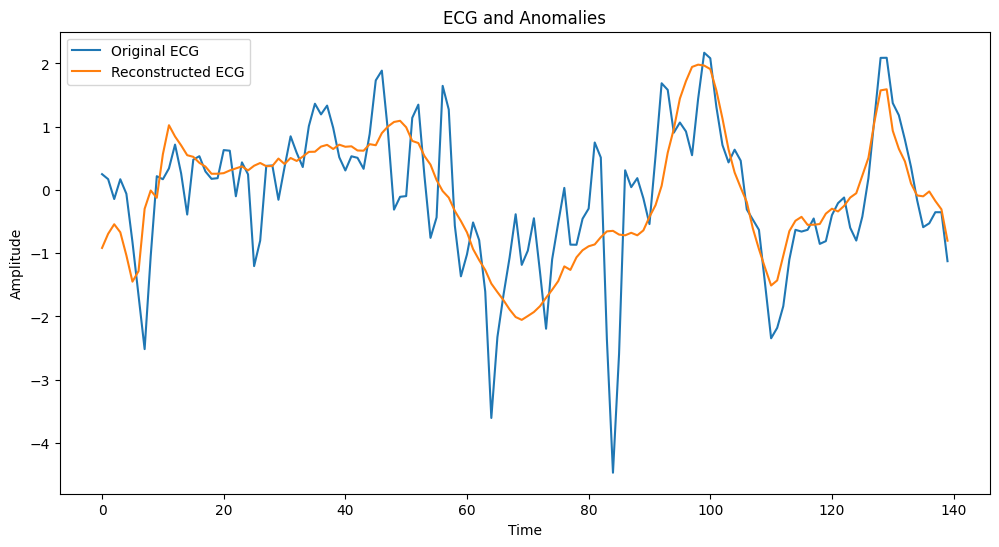

In [45]:
n = 4
anomaly_index = anomalies_index[n]
plt.figure(figsize=(12, 6))
plt.plot(x_test[anomaly_index], label='Original ECG')
plt.plot(y_pred[anomaly_index], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('ECG and Anomalies')
plt.show()

In [46]:
# Evaluate the model

print("Confusion Matrix:")
print(confusion_matrix(y_test, anomalies))

print("\nClassification Report:")
print(classification_report(y_test, anomalies))


Confusion Matrix:
[[385  24]
 [565  26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.94      0.57       409
           1       0.52      0.04      0.08       591

    accuracy                           0.41      1000
   macro avg       0.46      0.49      0.32      1000
weighted avg       0.47      0.41      0.28      1000



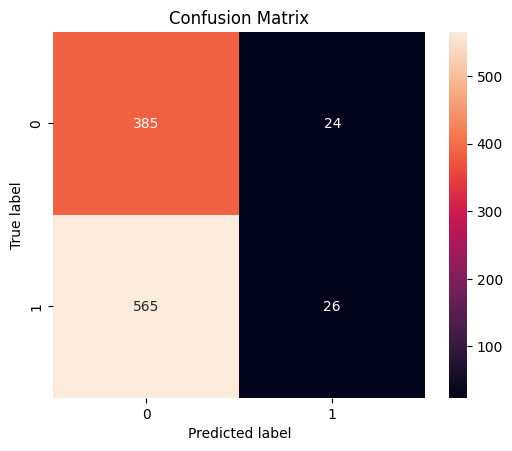

In [47]:
plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(y_test, anomalies), annot = True, fmt = 'd')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

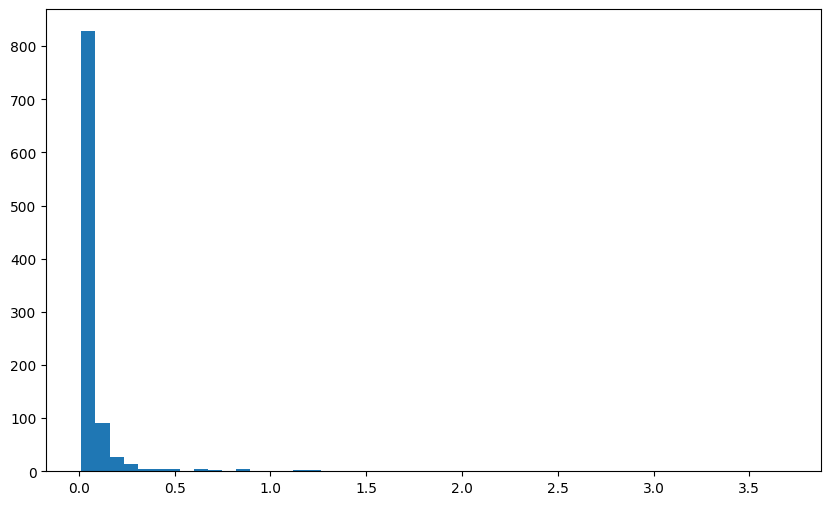

In [48]:
plt.figure(figsize=(10,6))
plt.hist(mse, bins=50)
plt.show()